# DESAFIO 04 - CICLO DE RANKINE

Para calcular a energia de nossa combustão, utilizamos a fórumla:


$$ \Delta H = \Delta U + \Delta V $$


Substituíndo pelos valores encontrados no desafio anterior, vamos ter o seguinte:

* pressão(p) = 1 atm
* Delta H = 3037.7 kJ/mol      (+/-0.8 kJ/mol)
* Delta V = 
* Delta U = 


### **SOBRE O CICLO**

**Ciclo de Rankine**: O ciclo de rankine ideal é um tipo de ciclo termodinâmico que ignora a irreversibilidade termodinâmica dos sistemas. Ele converte a expansão de vapor de um fluido em energia mecânica. Inicialmente, tem-se uma bomba que envia o fluido em altas pressões para um boiler. Nesse boiler, o líquido, que acaba por evaporar, absorve energia proveninente de um combustível (fonte quente). Assim, o fluido no estado de vapor e em altas pressões, é guiado para uma turbina. Nessa turbina, a pressão do vapor faz com que esta se mova (coversão em energia mecânica), de modo que esse movimento esteja conectado a um gerador elétrico (conversão em energia elétrica). Nota-se que grande parte da energia e pressão do fluido é perdida na conversão para energia mecânica. Após passar pela turbina, o fluido, ainda na forma de vapor (apesar de que é quase líquido) passa por um condensador, de modo em que seja submetido a pressões atmosféricas e temperatura ambiente. Nesse sentido, o fluido é, então, novamente enviado para a bomba, o que gera o reinicio do ciclo. Nota-se que o uso do Ciclo de Rankine ideal se aplica aqui pelo fato de ser isentrópico (sem variação de entropia). Caso não fosse considerado o ideal, deveria-se realizar medições experimentais da variação de entorpia.

**Ciclo de Carnot x Ciclo de Rankine:** No Ciclo de Carnot o rendimento teórico é sempre de [VERIFICAR] na conversão para energia mecânica. Já o ciclo de Rankine, baseado na diferença de maior e menor temperatura do sistema e com base em gráficos de temperatura x entropia, pode-se calcular o rendimento do sistema. O rendimento é, de fato, a principal diferença entre os vários sitemas que utilizam o Ciclo de Rankine, o que inclui termoelétricas, usinas nucleares e aplicações fotovoltaicas, por exemplo.

**Água e Ciclo de Rankine:** No Ciclo de Rankine se pode utilizar uma variedade de fluidos: metanol e CFC são exemplos possíveis. Entretanto, é mais comum que seja utilizado água para o processo. Isso se deve pois a água é uma substância de abundância em meios naturais, barata e alta capacidade calorífica. A alta capacidade calorífica é extremamente interessante principalmente pelo fato de que consegue armazenar uma grande quantidade de energia (dada a alta capacidade calorífica). Assim, consegue transmitir uma grande quantidade de calor da fonte quente para a turbina, além de que pode ser usada no condensador, para condensar o fluido. Uma terceira aplicação, considerando a alta capacidade calorífica, é o fato de que a água pode ser utilizada pra evitar o superaquecimento de núcleos de reatores nucleares.

##  Anotações para o desafio 04:

Vamos aplicar a seguinte integral para encontrar a massa de água necessária:
$$ Q = m \int_{T_0}^{T_f} C_p (T) dT$$

    
Manipulando a integral para isolar o termo de massa(m), ficamos com:
<dt>
        
$$\frac{Q}{int} = m$$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')

In [2]:
agua = pd.read_csv(r'Cv_agua.txt')
agua

,T,Cvc,Cvb
0,0.01,75.981,76.026
1,10.00,75.505,75.586
2,20.00,74.893,75.386
3,25.00,74.548,75.336
4,30.00,74.181,75.309
5,40.00,73.392,75.300
6,50.00,72.540,75.334
7,60.00,71.644,75.399
8,70.00,70.716,75.491
9,80.00,69.774,75.611


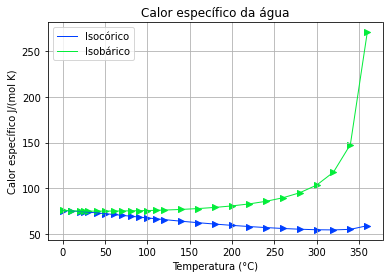

In [3]:
fig, ax = plt.subplots(1,1)
ax.set_title('Calor específico da água')
ax.set_xlabel('Temperatura (°C)')
ax.set_ylabel('Calor específico J/(mol K)')
ax.plot(agua['T'], agua['Cvc'], label = 'Isocórico', linewidth = 1)
ax.plot(agua['T'], agua['Cvb'], label = 'Isobárico', linewidth = 1)
ax.scatter(agua['T'], agua['Cvc'], marker = '>')
ax.scatter(agua['T'], agua['Cvb'], marker = '>')
ax.legend()
ax.grid('--')
plt.savefig('Calor_agua.png',dpi = 200)